## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset they merge on Mouse ID 
data_merge = pd.merge(mouse_metadata, study_results, on ='Mouse ID', how ='left')

In [2]:
data_merge.tail()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1892,z969,Naftisol,Male,9,30,45,73.867845,4


In [3]:
# Checking the number of mice in the DataFrame.

data_merge.tail()
number_check = data_merge['Mouse ID']
number_check.unique()

# The data is stored in an array right now so I need the length instead of using a different function call

len(number_check.unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#study_results.head() use this information to isolate Mouse ID and Timepoint. Each mouse should appear ten times 

data_merge['Mouse ID'].value_counts().head()

# g989 has 13 instances of values which means it has three additional values. 

g989    13
l700    10
i738    10
j984    10
z581    10
Name: Mouse ID, dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. I want to change the index to the Mous ID so I can search for that mouse specifically 

ID_index = data_merge.set_index('Mouse ID')

#Now that I have the index set to mouse id I can specifically reference the mouse/mice I'm looking for 

mouse_g989 = ID_index.loc['g989', :]
mouse_g989.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

g989_drop = ID_index.drop(index = 'g989')

#clean_results.loc['g989', :]

# I checked to make sure that g989 no longer exists in the data set which it doesnt

#When I tried to pull the data up I couldn't I have to reset the index because Mouse ID isn't a column, right now it's an index

clean_results = g989_drop.reset_index()
clean_results['Mouse ID'].value_counts().head()

#I saved the reset data as a new DF and checked to make sure none of the points exceeded 10 points. 

l700    10
o331    10
l509    10
j984    10
z581    10
Name: Mouse ID, dtype: int64

In [7]:
# Checking the number of mice in the clean DataFrame.

# Checking above I can see that the length is 248 so I will double check 

clean_count = clean_results['Mouse ID'].unique()

# The data is stored in an array right now so I need the length instead of using a different function call the same method was applied above

len(clean_count)

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Group the drug data so I can individually manipulate it 
grouped_data = clean_results.groupby(['Drug Regimen'])

mean_drug = grouped_data['Tumor Volume (mm3)'].mean()
median_drug = grouped_data['Tumor Volume (mm3)'].median()
variance_drug = grouped_data['Tumor Volume (mm3)'].var()
std_dev_drug = grouped_data['Tumor Volume (mm3)'].std()
sem_drug = grouped_data['Tumor Volume (mm3)'].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

stat_summary = pd.DataFrame({'Mean Tumor Volume': mean_drug, 'Median Tumor Volume': median_drug, 'Variance of Tumor Volume': variance_drug, 'Standard Deviation of Tumor Volume': std_dev_drug, 'SEM of Tumor Volume': sem_drug})
stat_summary

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Text(0, 0.5, 'Number of Timepoints')

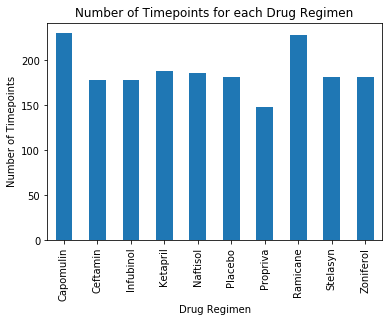

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

#I need to create specific data to feed the plot I thought that the graph needed to have it through time intervals from the 'Timepoint' section but the

#solution does not have that so I will base my work off of the solution so it is not incorrect

bar_data = grouped_data['Mouse ID'].count()
bar_data.plot(kind = 'bar')
plt.title('Number of Timepoints for each Drug Regimen')
plt.ylabel('Number of Timepoints')

Text(0, 0.5, 'Number of Timepoints')

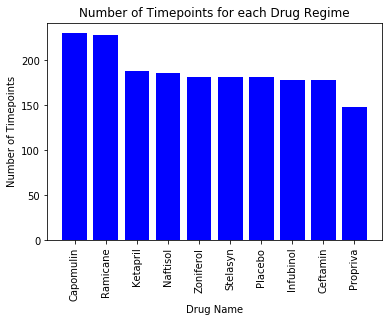

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#X bar data is an array of the names of drugs
xbuild = clean_results['Drug Regimen'].unique()

#Y bar data is an array of the timepoint counts of drugs so I created the count in order to get the specific number I want to put in my array

y_build = clean_results.set_index(['Drug Regimen'])
Ramicane_data = y_build.loc['Ramicane', :]['Timepoint'].count()
Capomulin_data = y_build.loc['Capomulin', :]['Timepoint'].count()
Infubinol_data = y_build.loc['Infubinol', :]['Timepoint'].count()
Ketapril_data = y_build.loc['Ketapril', :]['Timepoint'].count()
Naftisol_data = y_build.loc['Naftisol', :]['Timepoint'].count()
Placebo_data = y_build.loc['Placebo', :]['Timepoint'].count() 
Propriva_data = y_build.loc['Propriva', :]['Timepoint'].count()
Stelasyn_data = y_build.loc['Stelasyn', :]['Timepoint'].count()
Zoniferol_data = y_build.loc['Zoniferol', :]['Timepoint'].count()
Ceftamin_data = y_build.loc['Ceftamin', :]['Timepoint'].count()
ybar_data = (Capomulin_data,Ramicane_data,Ketapril_data,Naftisol_data,Zoniferol_data,Stelasyn_data,Placebo_data,Infubinol_data,Ceftamin_data,Propriva_data)
ybar_data
xbar_data = 'Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Stelasyn','Placebo','Infubinol','Ceftamin','Propriva'

plt.bar(xbar_data, ybar_data, color = 'Blue')

tick_loc = [value for value in xbar_data]
plt.xticks(tick_loc, ['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Stelasyn','Placebo','Infubinol','Ceftamin','Propriva'], rotation = 'vertical')
plt.title('Number of Timepoints for each Drug Regime')
plt.xlabel('Drug Name')
plt.ylabel('Number of Timepoints')

## Pie Plots

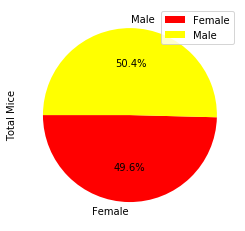

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sexgrouped = clean_results.groupby(['Sex', 'Mouse ID'])

#Create df's for the pie chart
sexgrouped = pd.DataFrame(sexgrouped.size())
gender_chart = pd.DataFrame(sexgrouped.groupby(['Sex']).count())

#Create the columns the first has the data from the count the second just needs to do a percentage calculation 
gender_chart.columns = ['Total Mice']
gender_chart['Percentage of Sex'] = 100 * (gender_chart['Total Mice']/(gender_chart['Total Mice'].sum()))

#Pie Chart generation

gender_chart.plot.pie(y = 'Total Mice', colors = ('Red', 'Yellow'), startangle = 180, autopct = '%1.1f%%')

([<matplotlib.patches.Wedge at 0x12ed6ba10>,
 [Text(-0.013822671882601981, -1.0999131482721833, 'Male'),
  Text(0.013822671882602115, 1.0999131482721833, 'Female')],
 [Text(-0.007539639208691989, -0.5999526263302818, '49.6%'),
  Text(0.007539639208692062, 0.5999526263302818, '50.4%')])

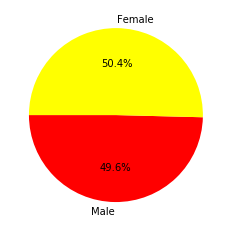

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# I just need to create the areas which I need to pull my info from for the plt.pie

label = ['Male', 'Female']
size = [49.6,50.4]
colors = ['Red', 'Yellow']
plt.pie(size, labels = label, colors = colors, autopct = '%1.1f%%', startangle = 180)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Found answers from doing box plot below however could not recover info from before


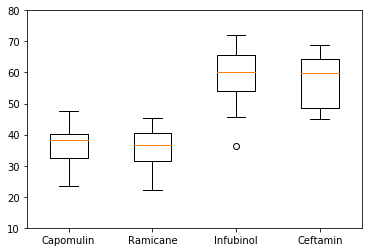

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
promising_regimes = clean_results[clean_results["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
promising_regimes = promising_regimes.sort_values(["Timepoint"], ascending=True)
promising_regimes
promising_regimes2 = promising_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

# Take the data and sort it via Drug and Mouse ID then I need to find the tumor volume at the end to find the most effective
promising_regimens_max = promising_regimes2.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
promising_regimens_max2 = promising_regimens_max.to_frame()
promising_regimens_max2
best_regimens = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

#Creating the data which will hold the box plot information 
box_chart = promising_regimens_max2.reset_index()
tumors = box_chart.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_df = pd.DataFrame(tumors)
tumor_df = tumor_df.reindex(best_regimens)
tumor_vol = [vol for vol in tumor_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vol, labels= best_regimens)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
